# Session 3: 모델 성능 평가 (Evaluation Metrics)

## 목표
유방암(Breast Cancer) 데이터셋을 활용하여 **오차 행렬(Confusion Matrix)**, **정밀도(Precision)**, **재현율(Recall)** 등 다양한 평가지표를 확인합니다.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

### 1. 모델 학습 (로지스틱 회귀)

In [2]:
# max_iter를 늘려줘서 수렴 경고 방지
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

### 2. 오차 행렬 (Confusion Matrix) 시각화
**TP, TN, FP, FN**을 눈으로 확인합니다.

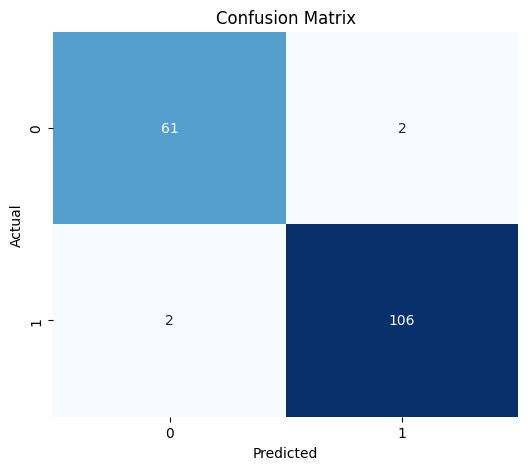

In [3]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3. 정밀도, 재현율, F1-Score 확인
`classification_report`를 사용하면 한눈에 볼 수 있습니다.

In [4]:
print(classification_report(y_test, pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## 5. 인사이트 도출 (Insights)

### 🌟 Key Takeaways
*   **정확도의 함정**: 암 환자 데이터처럼 불균형한 경우, 무조건 "정상"이라고만 찍어도 정확도는 90%가 넘을 수 있습니다. 정확도만 믿으면 위험합니다.
*   **정밀도와 재현율**: "암을 놓치지 않는 것(Recall)"이 중요한지, "오진을 줄이는 것(Precision)"이 중요한지에 따라 봐야 할 지표가 다름을 배웠습니다.

### 🔬 Try More
*   **상황 가정**: 만약 스팸 메일 필터라면 Recall과 Precision 중 무엇이 더 중요할까요? (정상 메일이 스팸통에 가면 안 되니까 Precision이 중요합니다!)
